<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Bank Marketing Datasets</font></h1>

<h1 align=center><font size = 6>Has the Client Subscribe a Term Deposit?</font></h1>

## Data Preparation

Load the library you need.

Get your Bank Marketing Datasets at kode.id and load the dataframe to your notebook.

In [81]:
# import package

import math
import statistics
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats.distributions as dist

import random
import warnings
import statsmodels.api as sm
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, LabelEncoder

# import dataset
from sklearn.datasets import load_breast_cancer

# optional, untuk visualisasi decision tree
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image
from sklearn import tree

from matplotlib.legend_handler import HandlerLine2D

In [82]:
# Load dataset

df_client = pd.read_csv("dataset/bank-additional-full.csv", sep=";") # separator ; pada file asli
df_client

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [83]:
df_client.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [84]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* age  : umur (int).
* job  : pekerjaan (string;categorical).
* marital  : marital status (string;categorical).
* education  : pendidikan (string;categorical).
* default  : status kepemilikan kredit (string;categorical).
* housing  : status kepemilikan pinjaman rumah (string;categorical).
* loan  : status kepemilikan pinjaman personal (string;categorical).
* contact  : kontak (string;categorical).
* month  : bulan terakhir dihubungi (string;categorical).
* day_of_week  : hari terakhir dihubungi (string;categorical).
* duration  : durasi komunikasi saat dihubungi (float).
* campaign  : jumlah kontak (int).
* pdays  : jumlah hari setelah klien dihubungi (int).
* previous  :jumlah klien dihubungi seelum kampanye ini (int).
* poutcome  : keberhasilan setelah kampanye (string;categorical).
* emp.var.rate  : ind. employment variation rate (float).
* cons.price.idx  : ind. consumer price index (float).
* cons.conf.idx  : ind. consumer confidence index (float).
* euribor3m  : ind. euribor 3 month rate (float).
* nr.employed  : ind. jumlah pekerja (int).
* y  : (string;categorical).

In [85]:
display(df_client[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']].head(3))
print()
display(df_client[['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays','previous']].head(3))
print()
display(df_client[['poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].head(3))

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no


,contact,month,day_of_week,duration,campaign,pdays,previous
0,telephone,may,mon,261,1,999,0
1,telephone,may,mon,149,1,999,0
2,telephone,may,mon,226,1,999,0


,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Data Encoding

In [86]:
# listing categorical data

job = df_client['job'].to_numpy()
marital = df_client['marital'].to_numpy()
education = df_client['education'].to_numpy()
default = df_client['default'].to_numpy()
housing = df_client['housing'].to_numpy()
loan = df_client['loan'].to_numpy()
contact = df_client['contact'].to_numpy()
month = df_client['month'].to_numpy()
day_of_week = df_client['day_of_week'].to_numpy()
poutcome = df_client['poutcome'].to_numpy()
y = df_client['y'].to_numpy()


In [87]:
df_client = df_client[['age', 'duration', 'campaign', 'pdays','previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']]

In [88]:
# encode data to string

le = LabelEncoder()
job_en = le.fit_transform(job)
print(le.classes_)

le = LabelEncoder()
marital_en = le.fit_transform(marital)
print(le.classes_)

le = LabelEncoder()
education_en = le.fit_transform(education)
print(le.classes_)

le = LabelEncoder()
default_en = le.fit_transform(default)
print(le.classes_)

le = LabelEncoder()
housing_en = le.fit_transform(housing)
print(le.classes_)

le = LabelEncoder()
loan_en = le.fit_transform(loan)
print(le.classes_)

le = LabelEncoder()
contact_en = le.fit_transform(contact)
print(le.classes_)

le = LabelEncoder()
month_en = le.fit_transform(month)
print(le.classes_)

le = LabelEncoder()
day_of_week_en = le.fit_transform(day_of_week)
print(le.classes_)

le = LabelEncoder()
poutcome_en = le.fit_transform(poutcome)
print(le.classes_)

le = LabelEncoder()
y_en = le.fit_transform(y)
print(le.classes_)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
['divorced' 'married' 'single' 'unknown']
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
['fri' 'mon' 'thu' 'tue' 'wed']
['failure' 'nonexistent' 'success']
['no' 'yes']


In [89]:
df_ctgr = pd.DataFrame({'job':job_en,'marital':marital_en,'education':education_en,'default':default_en,'housing':housing_en,
                'loan':loan_en,'contact':contact_en,'month':month_en,'day_of_week':day_of_week_en,
                'poutcome':poutcome_en,'y':y_en})
df_ctgr

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1,1
41184,1,1,5,0,0,0,0,7,0,1,0
41185,5,1,6,0,2,0,0,7,0,1,0
41186,9,1,5,0,0,0,0,7,0,1,1


In [90]:
df_client

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [91]:
df_client[['job','marital','education','default','housing',
                'loan','contact','month','day_of_week',
                'poutcome','y']] = df_ctgr[['job','marital','education','default','housing',
                'loan','contact','month','day_of_week',
                'poutcome','y']]

df_client.head(3)

C:\Users\mindr\AppData\Local\Temp\ipykernel_3460\915879124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client[['job','marital','education','default','housing',
C:\Users\mindr\AppData\Local\Temp\ipykernel_3460\915879124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client[['job','marital','education','default','housing',
C:\Users\mindr\AppData\Local\Temp\ipykernel_3460\915879124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0


In [92]:
pd.DataFrame({'min':df_client.min(), 'mean':df_client.mean(),'max':df_client.max(),})

,min,mean,max
age,17.000,40.024060,98.000
duration,0.000,258.285010,4918.000
campaign,1.000,2.567593,56.000
pdays,0.000,962.475454,999.000
previous,0.000,0.172963,7.000
emp.var.rate,-3.400,0.081886,1.400
cons.price.idx,92.201,93.575664,94.767
cons.conf.idx,-50.800,-40.502600,-26.900
euribor3m,0.634,3.621291,5.045
nr.employed,4963.600,5167.035911,5228.100


## Logistic Regression

Membuat Model

In [93]:
# Target : y
# feature : !=y

features = df_client.drop(columns=["y"])
target = df_client["y"]

In [94]:
# buat model
model_lr = LogisticRegression()

Melatih Model

In [95]:
# latih model

model_lr.fit(features, target)

c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluasi Model

In [96]:
# tentukan y prediksi
y_pred = model_lr.predict(features)

# keakuratan
print("Accuracy")
print(classification_report(target,y_pred))

Accuracy
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     36548
           1       0.66      0.38      0.48      4640

    accuracy                           0.91     41188
   macro avg       0.79      0.68      0.72     41188
weighted avg       0.90      0.91      0.90     41188



Akurasi : `91%` untuk memprediksi apakah klien sudah subscribe term deposit.

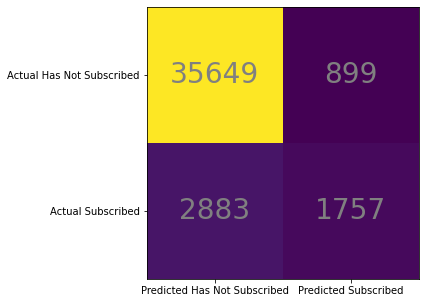

In [97]:
cm_lr = confusion_matrix(target, y_pred)

# visualisasi confusion matrix

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm_lr)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Has Not Subscribed', 'Predicted Subscribed'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Has Not Subscribed', 'Actual Subscribed'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lr[i, j], ha='center', va='center', color='grey', fontsize=28)
plt.show()

Keakuratan model `logistic regression` untuk case ini yang didapatkan dari confussion matriks adalah terdapat 35.649 data yang diprediksi `no` benar, namun hanya terdapat 1.757 data yang diprediksi `yes` benar. Hanya kita bisa melihat perbandingan antara prediksi benar dan salah pada masing-masing yes dan no. Yang benar diprediksi masih lebih besar akurasinya.

## Prediksi

* ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
* ['divorced' 'married' 'single' 'unknown']
* ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
* ['no' 'unknown' 'yes']
* ['no' 'unknown' 'yes']
* ['no' 'unknown' 'yes']
* ['cellular' 'telephone']
* ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
* ['fri' 'mon' 'thu' 'tue' 'wed']
* ['failure' 'nonexistent' 'success']
* ['no' 'yes']

In [98]:
'''
Kondisi klien yang akan diprediksi
age = 27
duration = 535
campaign = 8
pdays = 360
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5300
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[27, 535, 8, 360, 18, 1, 93.5, -22.4, 3.5, 5300, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]
model_lr.predict(client)

c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

`Client Has not Subscribed a Term Deposite.`

## K-Nearest Neighbor

Data Preparation

In [99]:
df_client

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,2,0,0,7,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,6,0,2,0,0,7,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,1


In [100]:
features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,5,0,2,0,0,7,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,5,0,0,0,0,7,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,6,0,2,0,0,7,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,9,1,5,0,0,0,0,7,0,1


In [101]:
target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

Buat dan Latih Model

In [102]:
# maks neighbors (k) yang digunakan untuk memprediksi 
n = int((len(df_client)-119)*0.003)
n


123

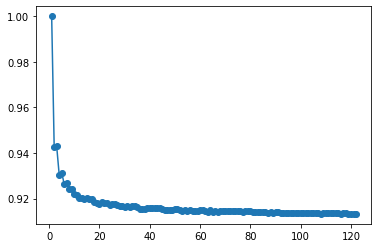

In [103]:
# k yang ditetapkan untuk membantu memprediksi akan dilihat yang paling akurat

i = range(1,n)

scores = []
for k in i:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(features, target)

    y_pred = model_knn.predict(features)

    scores.append(accuracy_score(target, y_pred))

plt.plot(i, scores, marker="o")

Terlihat pada grafik di atas bahwa semakin banyak k yang dipilih maka akurasi prediksi menurun. Akan diambil k=2 untuk model.

In [104]:
k=2

# buat modet
model_knn = KNeighborsClassifier(n_neighbors=k)

# latih model
model_knn.fit(features, target)

KNeighborsClassifier(n_neighbors=2)

Evaluasi Model

In [105]:
y_pred = model_knn.predict(features)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36548
           1       1.00      0.49      0.66      4640

    accuracy                           0.94     41188
   macro avg       0.97      0.75      0.81     41188
weighted avg       0.95      0.94      0.93     41188



Akurasi : `94%` untuk memprediksi apakah klien sudah subscribe term deposit.

Skor Akurasi Model =  0.9425803632125862


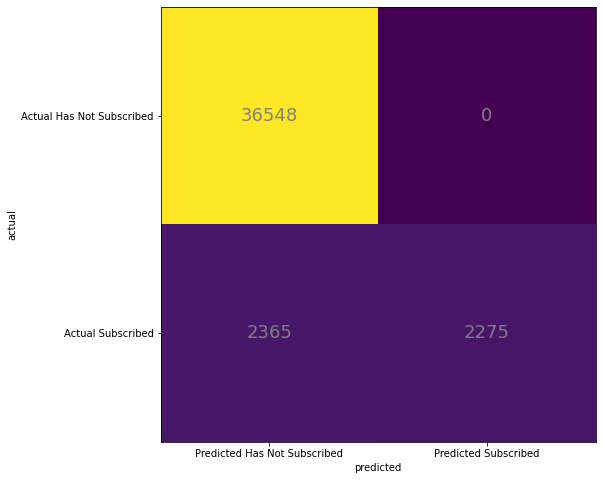

In [106]:
print("Skor Akurasi Model = ",accuracy_score(target, y_pred))

cm = confusion_matrix(target, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Has Not Subscribed', 'Predicted Subscribed'))
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Has Not Subscribed', 'Actual Subscribed'))
ax.set_ylabel("actual")
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='grey', fontsize=18)
plt.show()


Keakuratan model `KNN` untuk case ini yang didapatkan dari confussion matriks adalah terdapat 36.548 data yang diprediksi `no` benar, namun hanya terdapat 2.275 data yang diprediksi `yes` benar. Hanya kita bisa melihat perbandingan antara prediksi benar dan salah pada masing-masing yes dan no. Yang benar diprediksi masih lebih besar akurasinya.

Prediksi dengan Model

In [107]:
pd.DataFrame({'min':df_client.min(), 'mean':df_client.mean(),'max':df_client.max(),})

,min,mean,max
age,17.000,40.024060,98.000
duration,0.000,258.285010,4918.000
campaign,1.000,2.567593,56.000
pdays,0.000,962.475454,999.000
previous,0.000,0.172963,7.000
emp.var.rate,-3.400,0.081886,1.400
cons.price.idx,92.201,93.575664,94.767
cons.conf.idx,-50.800,-40.502600,-26.900
euribor3m,0.634,3.621291,5.045
nr.employed,4963.600,5167.035911,5228.100


In [108]:
'''
Kondisi klien yang akan diprediksi
age = 40
duration = 250
campaign = 2
pdays = 960
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5100
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[40, 250, 2, 960, 18, 1, 93.5, -22.4, 3.5, 5100, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]

predict = model_knn.predict(client)
print(predict)

[0]


c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


`Client Has not Subscribed a Term Deposite.`

## Naive Bayes

Metode klasifikasi dimana setiap fitur dianggap terpisah, tidak saling mempengaruhi satu sama lain.

Data Preparation

In [109]:
df_client

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,2,0,0,7,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,6,0,2,0,0,7,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,1


In [110]:
features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,5,0,2,0,0,7,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,5,0,0,0,0,7,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,6,0,2,0,0,7,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,9,1,5,0,0,0,0,7,0,1


In [111]:
target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

Membuat Model

In [112]:
model_nb = GaussianNB()

Melatih Model

In [113]:
model_nb.fit(features, target)


GaussianNB()

Evaluasi Model

In [114]:
# evaluasi keakuratan model

y_pred = model_nb.predict(features)

print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     36548
           1       0.38      0.60      0.47      4640

    accuracy                           0.85     41188
   macro avg       0.66      0.74      0.69     41188
weighted avg       0.88      0.85      0.86     41188



Akurasi : `85%` untuk memprediksi apakah klien sudah subscribe term deposit.

Skor Akurasi Model =  0.8465572496843741


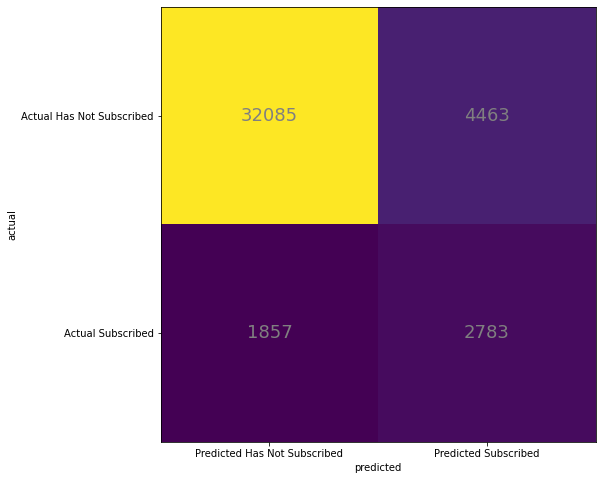

In [115]:
print("Skor Akurasi Model = ",accuracy_score(target, y_pred))
cm = confusion_matrix(target, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Has Not Subscribed', 'Predicted Subscribed'))
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Has Not Subscribed', 'Actual Subscribed'))
ax.set_ylabel("actual")
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='grey', fontsize=18)
plt.show()

Keakuratan model `Naive Bayes` untuk case ini yang didapatkan dari confussion matriks adalah terdapat 32.085 data yang diprediksi `no` benar, namun hanya terdapat 2.783 data yang diprediksi `yes` benar.

Prediksi dengan Model

In [116]:
'''
Kondisi klien yang akan diprediksi
age = 40
duration = 250
campaign = 2
pdays = 960
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5100
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[40, 250, 2, 960, 18, 1, 93.5, -22.4, 3.5, 5100, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]

predict = model_nb.predict(client)
print(predict)

[1]


c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


`Client Has Subscribed a Term Deposite.`
* Perbedaan hasil prediksi klien yang sama dengan model KNN sebelumnya kemungkinan dikarenakan asumsi fitur dianggap terpisah, tidak saling mempengaruhi satu sama lain.

## Decision Tree

Data Preparation

In [117]:
print('Feature')
display(features)
print('Target')
display(target)

Feature


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,5,0,2,0,0,7,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,5,0,0,0,0,7,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,6,0,2,0,0,7,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,9,1,5,0,0,0,0,7,0,1


Target


0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

Membuat Model

In [118]:
model_dt = DecisionTreeClassifier()

Melatih Model

In [119]:
model_dt.fit(features, target)

DecisionTreeClassifier()

Evaluasi Model

In [120]:
y_pred = model_dt.predict(features)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36548
           1       1.00      1.00      1.00      4640

    accuracy                           1.00     41188
   macro avg       1.00      1.00      1.00     41188
weighted avg       1.00      1.00      1.00     41188



In [121]:
features.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

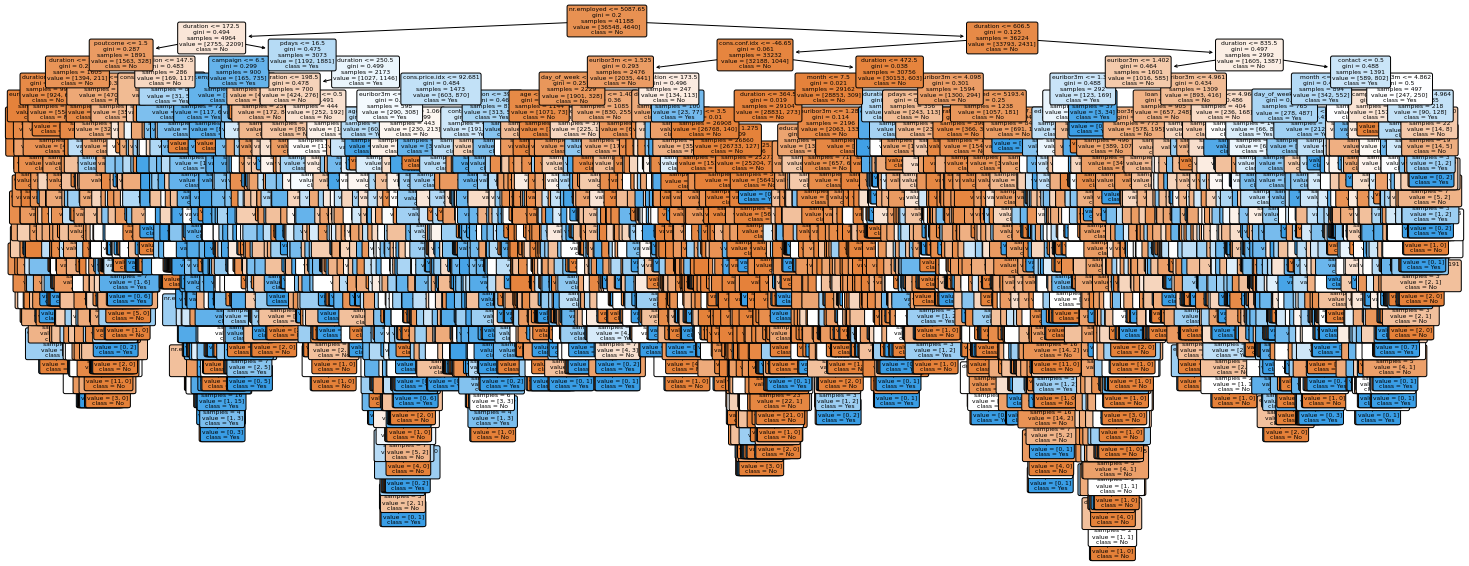

In [122]:
# optional - visualisasi decision tree
plt.figure(figsize=(25, 10))
tree.plot_tree(model_dt, 
               filled=True, rounded=True, 
               feature_names = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
               class_names = ['No','Yes'],
               fontsize=6)
plt.show()

kak aku graphviznya malah error. aku coba di cmd dot -c tapi failed for write :(

Prediksi

In [124]:
'''
Kondisi klien yang akan diprediksi
age = 40
duration = 250
campaign = 2
pdays = 960
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5100
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[40, 250, 2, 960, 18, 1, 93.5, -22.4, 3.5, 5100, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]

predict = model_dt.predict(client)
print(predict)

[0]


c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


`Client Has not Subscribed a Term Deposite.`

## Random Forest

Data Preparation

In [126]:
display(df_client)
display(features)
display(target)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,2,0,0,7,0,1,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,6,0,2,0,0,7,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,5,0,0,0,0,7,0,1,1


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,5,0,2,0,0,7,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,5,0,0,0,0,7,0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,6,0,2,0,0,7,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,9,1,5,0,0,0,0,7,0,1


0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [127]:
# split training dan testing data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(32950, 20) (8238, 20)
(32950,) (8238,)


Terdapat 3295 data yang akan di-train.

Buat Model

In [128]:
model_rf = RandomForestClassifier(max_depth=None)
# The deeper the tree, the more splits it has and it captures more information about the data.

Latih Model

In [130]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

Evaluasi Model

In [131]:
y_pred = model_rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.67      0.53      0.59       919

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



Akurasi : `91%` untuk memprediksi apakah dalam menentukan fitur yang paling berpengaruh

Skor Akurasi Model =  0.9184268026219956


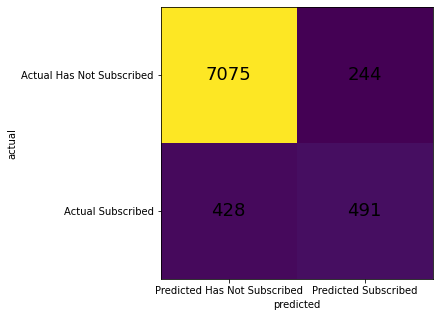

In [132]:
print("Skor Akurasi Model = ",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Has Not Subscribed', 'Predicted Subscribed'))
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Has Not Subscribed', 'Actual Subscribed'))
ax.set_ylabel("actual")
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=18)
plt.show()

Keakuratan model `Random Forest` untuk case ini yang didapatkan dari confussion matriks adalah terdapat 716 data yang diprediksi `no` benar, namun hanya terdapat 30 data yang diprediksi `yes` benar.

In [133]:
# melihat feature importance
print(features.columns)
print(model_rf.feature_importances_)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
[0.09354631 0.31148744 0.04278919 0.03295163 0.0129022  0.02396612
 0.02201884 0.02874248 0.10460863 0.0651501  0.04855346 0.02453056
 0.04326366 0.00908719 0.02076699 0.01489391 0.0102307  0.0185014
 0.04152664 0.03048255]


In [134]:
df_fi = pd.DataFrame({"features":features.columns, "importances":model_rf.feature_importances_})
df_fi = df_fi.sort_values(by="importances", ascending=False)
df_fi

,features,importances
1,duration,0.311487
8,euribor3m,0.104609
0,age,0.093546
9,nr.employed,0.065150
10,job,0.048553
12,education,0.043264
2,campaign,0.042789
18,day_of_week,0.041527
3,pdays,0.032952
19,poutcome,0.030483


Text(0.5, 1.0, 'Feature Importances')

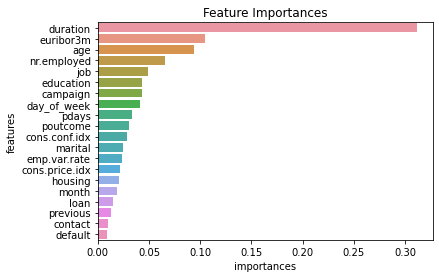

In [135]:
sns.barplot(y=df_fi["features"], x=df_fi["importances"])
plt.title("Feature Importances")

durasi komunikasi saat dihubungi paling mempengaruhi dalam penentuan hasil target (31,149%)

Prediksi

In [136]:
'''
Kondisi klien yang akan diprediksi
age = 40
duration = 250
campaign = 2
pdays = 960
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5100
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[40, 250, 2, 960, 18, 1, 93.5, -22.4, 3.5, 5100, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]

predict = model_rf.predict(client)
print(predict)

[0]


c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


`Client Has not Subscribed a Term Deposite.`

## Support Vector Machine (SVM)

membagi data ke dalam beberapa kelas dengan maksimum marginal hyperplane (MMH)

Data Preparation

In [137]:
# split data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

Buat Model

In [138]:
model_svm = SVC(kernel="linear")

Latih Model

In [139]:
model_svm.fit(x_train, y_train)

SVC(kernel='linear')

Evaluasi Model

In [140]:
y_pred = model_svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7319
           1       0.68      0.38      0.49       919

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



Akurasi : `91%` untuk memprediksi apakah klien sudah subscribe term deposit.

Skor Akurasi Model =  0.9104151493080845


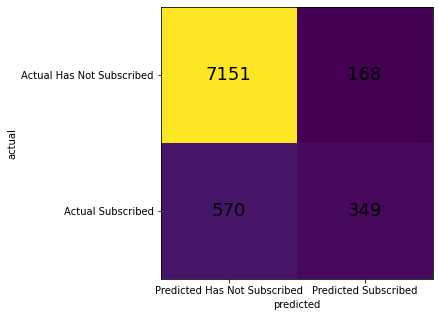

In [141]:
print("Skor Akurasi Model = ",accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Has Not Subscribed', 'Predicted Subscribed'))
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Has Not Subscribed', 'Actual Subscribed'))
ax.set_ylabel("actual")
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=18)
plt.show()

Keakuratan model `Random Forest` untuk case ini yang didapatkan dari confussion matriks adalah terdapat 7.151 data yang diprediksi `no` benar, namun hanya terdapat 348 data yang diprediksi `yes` benar.

Prediksi

In [142]:
'''
Kondisi klien yang akan diprediksi
age = 40
duration = 250
campaign = 2
pdays = 960
previous = 18
emp.var.rate = 1
cons.price.idx = 93.5
cons.conf.idx = -22.4
euribor3m = 3.5
nr.employed = 5100
job = student : 8
marital = married : 1
education = university.degree : 6
default = yes : 2
housing = no : 0
loan = yes : 2
contact = cellular : 0
month = jul : 3
day_of_week = thu : 2
poutcome = nonexistent : 1
'''

client = [[40, 250, 2, 960, 18, 1, 93.5, -22.4, 3.5, 5100, 8, 1, 6, 2, 0, 2, 0, 3, 2, 1]]

predict = model_svm.predict(client)
print(predict)

[0]


c:\Users\mindr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


`Client Has not Subscribed a Term Deposite.`